<a href="https://colab.research.google.com/github/fiza-jamali/data-science-projects/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
X = df[['median_income']].values
y = df['median_house_value'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

[[8.5407]
 [7.2013]
 [5.1478]
 ...
 [2.9643]
 [3.0992]
 [2.3903]]


In [36]:
print(y_train)

[398800. 353600. 138900. ... 147400. 142600. 236100.]


In [37]:
print(X_test)

[[3.5959]
 [8.1124]
 [2.5288]
 ...
 [0.9573]
 [5.1377]
 [1.6136]]


In [38]:
print(y_test)

[142700. 500001.  61800. ... 162500. 360700. 137500.]


In [41]:
# STEP 3: TRAIN RANDOM FOREST MODEL
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [40]:
print(f"\n{'='*70}")
print(f"RANDOM FOREST MODEL PERFORMANCE")
print(f"{'='*70}")
print(f"Training R² Score: {r2_train:.4f}")
print(f"Testing R² Score:  {r2_test:.4f}")
print(f"MAE:               ${mae_test:,.2f}")
print(f"RMSE:              ${rmse_test:,.2f}")
print(f"{'='*70}\n")


RANDOM FOREST MODEL PERFORMANCE
Training R² Score: 0.6289
Testing R² Score:  0.4566
MAE:               $64,521.71
RMSE:              $86,529.62



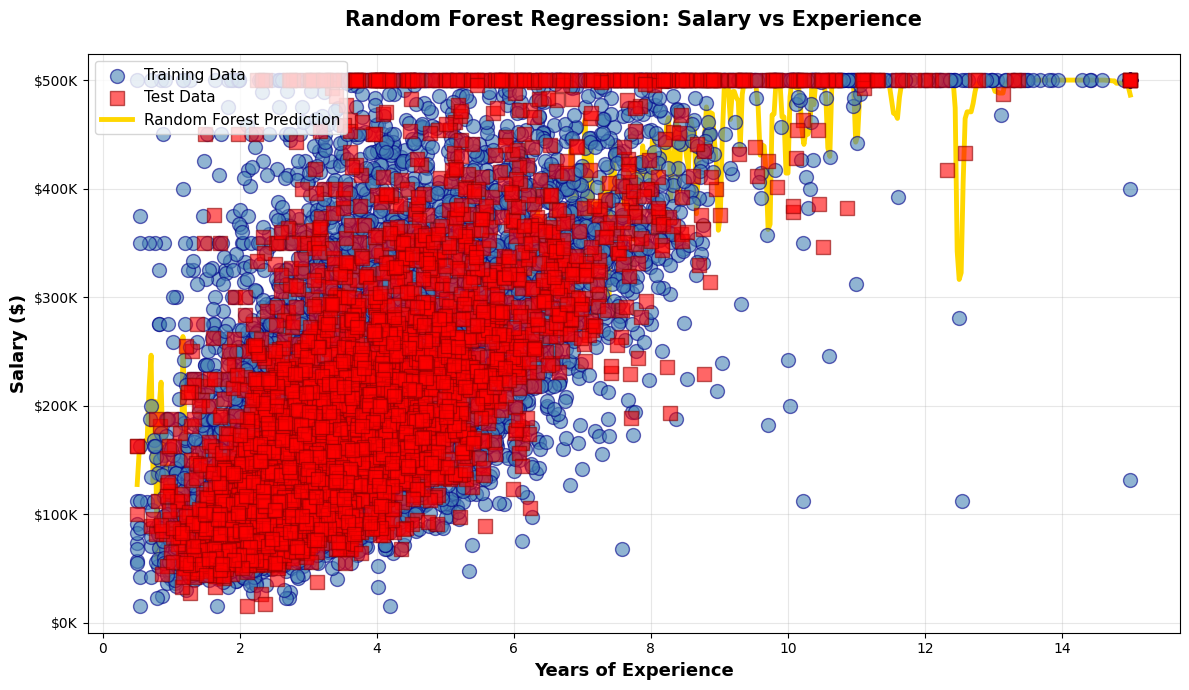

In [20]:
X_grid = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred_grid = rf_model.predict(X_grid)

fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(X_train, y_train, color='steelblue', s=100, alpha=0.6,
          label='Training Data', edgecolors='darkblue', linewidth=1, zorder=3)
ax.scatter(X_test, y_test, color='red', s=100, alpha=0.6,
          label='Test Data', marker='s', edgecolors='darkred', linewidth=1, zorder=3)
ax.plot(X_grid, y_pred_grid, color='gold', linewidth=3.5,
       label='Random Forest Prediction', zorder=2)

ax.set_xlabel('Years of Experience', fontsize=13, fontweight='bold')
ax.set_ylabel('Salary ($)', fontsize=13, fontweight='bold')
ax.set_title('Random Forest Regression: Salary vs Experience', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

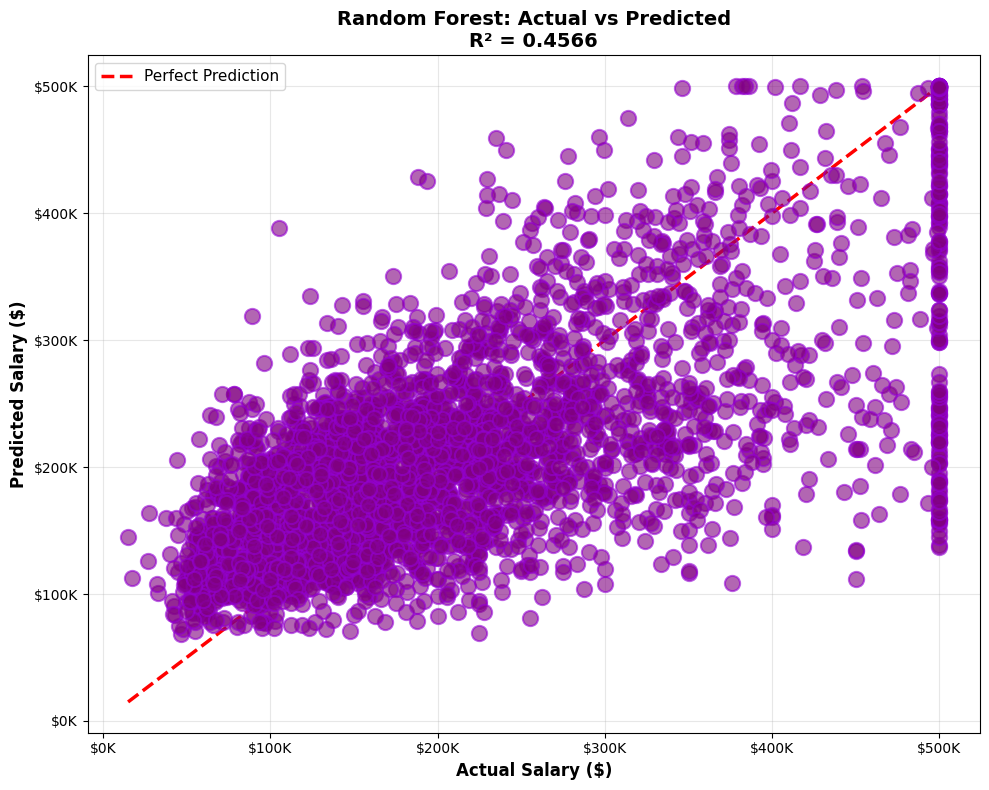

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(y_test, y_pred_test, alpha=0.6, color='purple', s=120,
          edgecolors='darkviolet', linewidth=1.5, zorder=3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
       'r--', lw=2.5, label='Perfect Prediction', zorder=2)

ax.set_xlabel('Actual Salary ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Salary ($)', fontsize=12, fontweight='bold')
ax.set_title(f'Random Forest: Actual vs Predicted\nR² = {r2_test:.4f}',
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

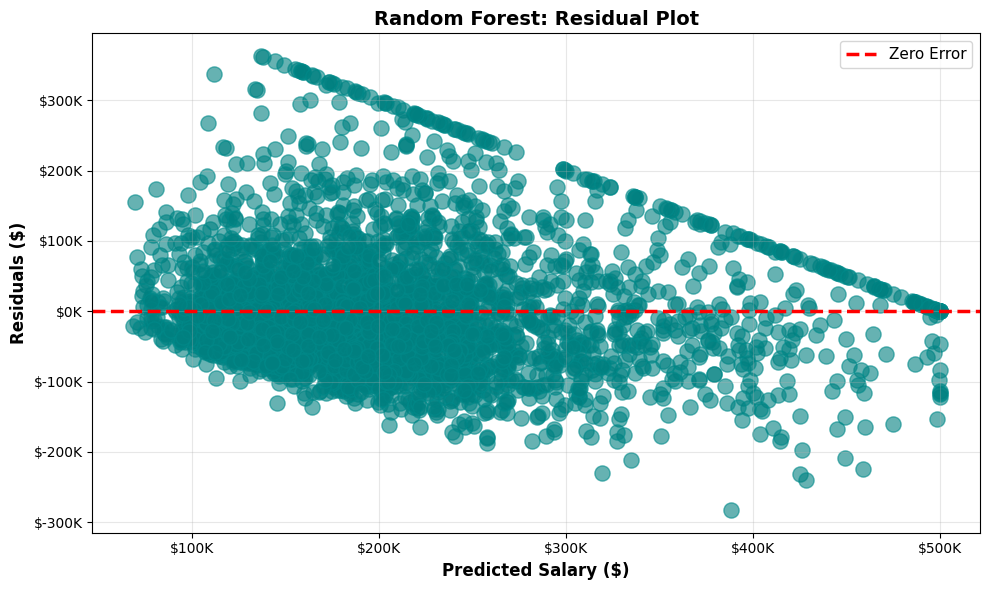

In [22]:
residuals = y_test - y_pred_test
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(y_pred_test, residuals, alpha=0.6, color='teal', s=120,
          edgecolors='darkcyan', linewidth=1)
ax.axhline(y=0, color='r', linestyle='--', lw=2.5, label='Zero Error')

ax.set_xlabel('Predicted Salary ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
ax.set_title('Random Forest: Residual Plot', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

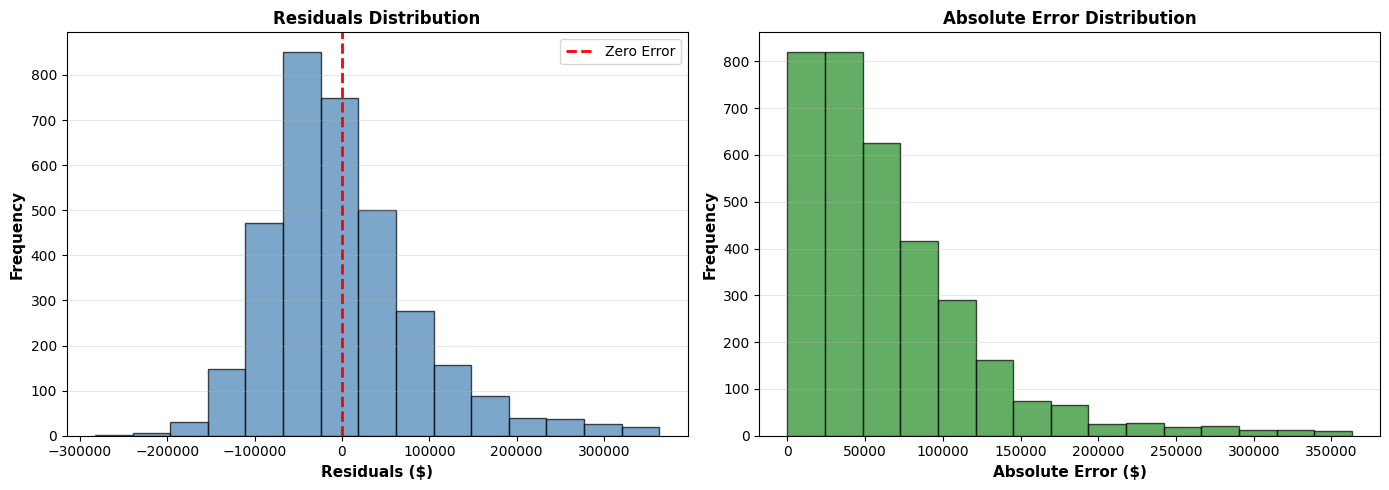

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(residuals, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[0].set_xlabel('Residuals ($)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Residuals Distribution', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

abs_errors = np.abs(residuals)
axes[1].hist(abs_errors, bins=15, color='forestgreen', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Absolute Error ($)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Absolute Error Distribution', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

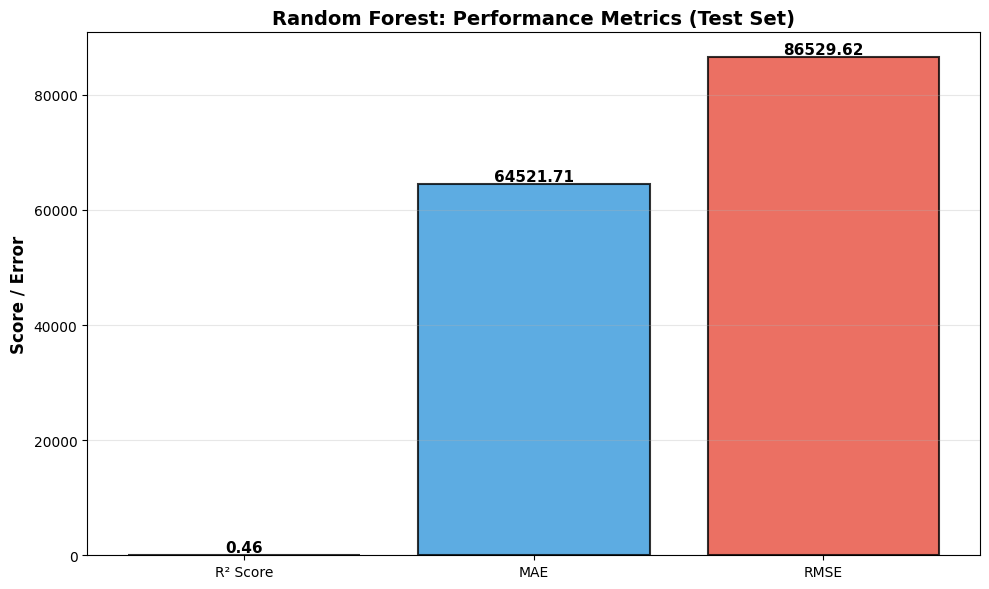

In [24]:
metrics_names = ['R² Score', 'MAE', 'RMSE']
metrics_values = [r2_test, mae_test, rmse_test]
colors_list = ['#2ecc71', '#3498db', '#e74c3c']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics_names, metrics_values, color=colors_list, alpha=0.8,
             edgecolor='black', linewidth=1.5)

ax.set_ylabel('Score / Error', fontsize=12, fontweight='bold')
ax.set_title('Random Forest: Performance Metrics (Test Set)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

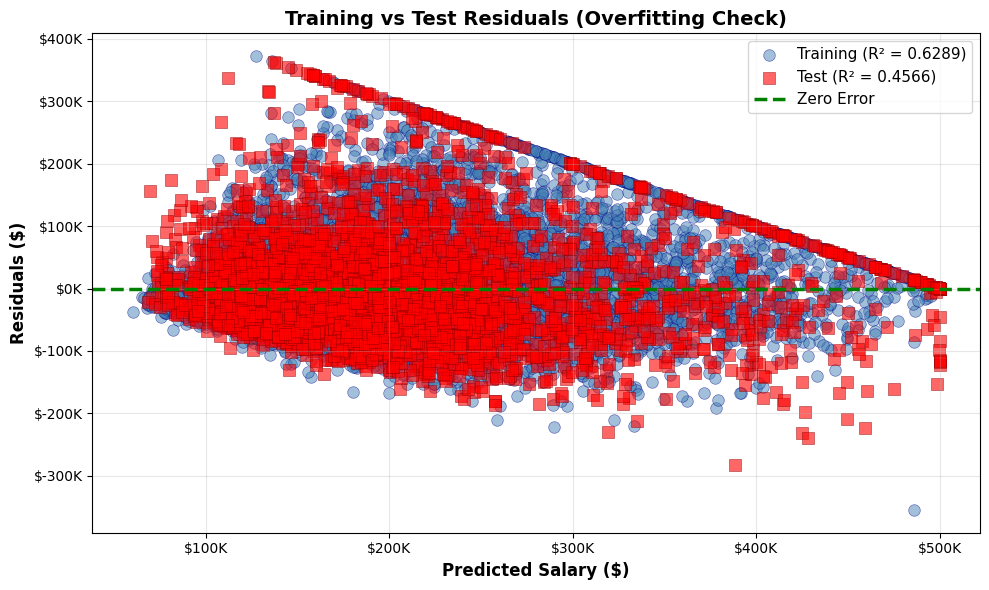

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(y_pred_train, y_train - y_pred_train, alpha=0.5, color='steelblue', s=70,
          label=f'Training (R² = {r2_train:.4f})', edgecolors='darkblue', linewidth=0.5)
ax.scatter(y_pred_test, residuals, alpha=0.6, color='red', s=70, marker='s',
          label=f'Test (R² = {r2_test:.4f})', edgecolors='darkred', linewidth=0.5)
ax.axhline(y=0, color='green', linestyle='--', lw=2.5, label='Zero Error')

ax.set_xlabel('Predicted Salary ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
ax.set_title('Training vs Test Residuals (Overfitting Check)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

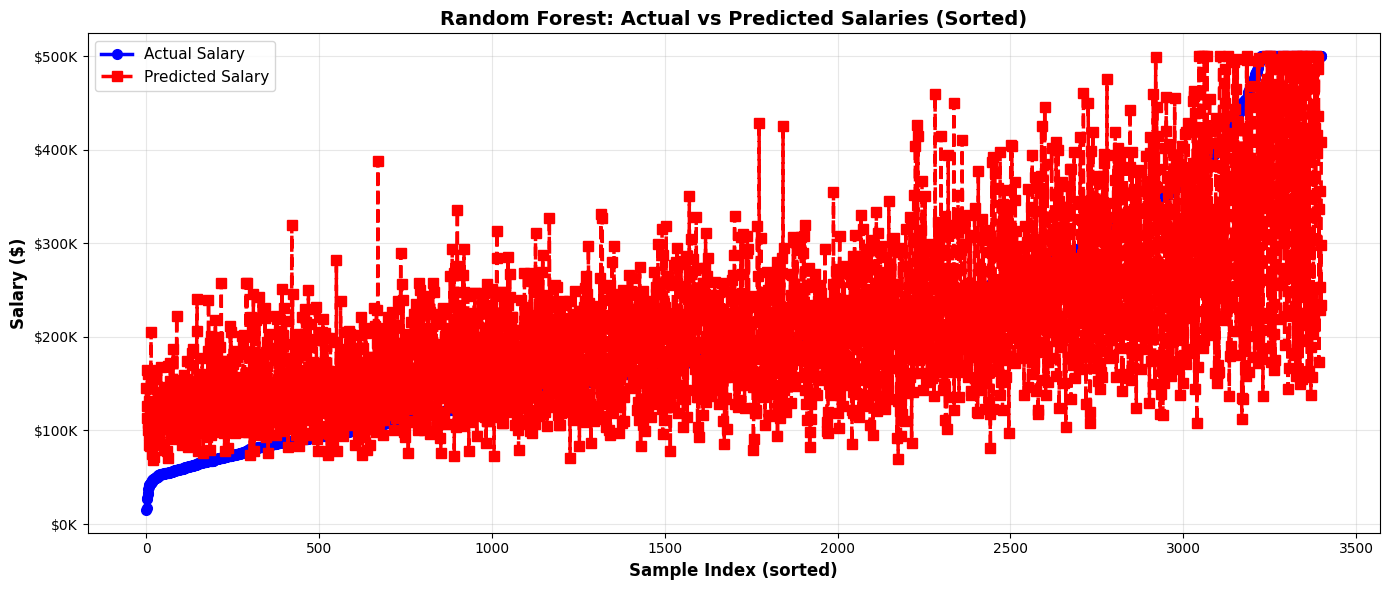

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))

sort_idx = np.argsort(y_test)
y_test_sorted = y_test[sort_idx]
y_pred_sorted = y_pred_test[sort_idx]

ax.plot(y_test_sorted, 'b-', linewidth=2.5, marker='o', markersize=7,
       label='Actual Salary', zorder=2)
ax.plot(y_pred_sorted, 'r--', linewidth=2.5, marker='s', markersize=7,
       label='Predicted Salary', zorder=2)

ax.set_xlabel('Sample Index (sorted)', fontsize=12, fontweight='bold')
ax.set_ylabel('Salary ($)', fontsize=12, fontweight='bold')
ax.set_title('Random Forest: Actual vs Predicted Salaries (Sorted)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

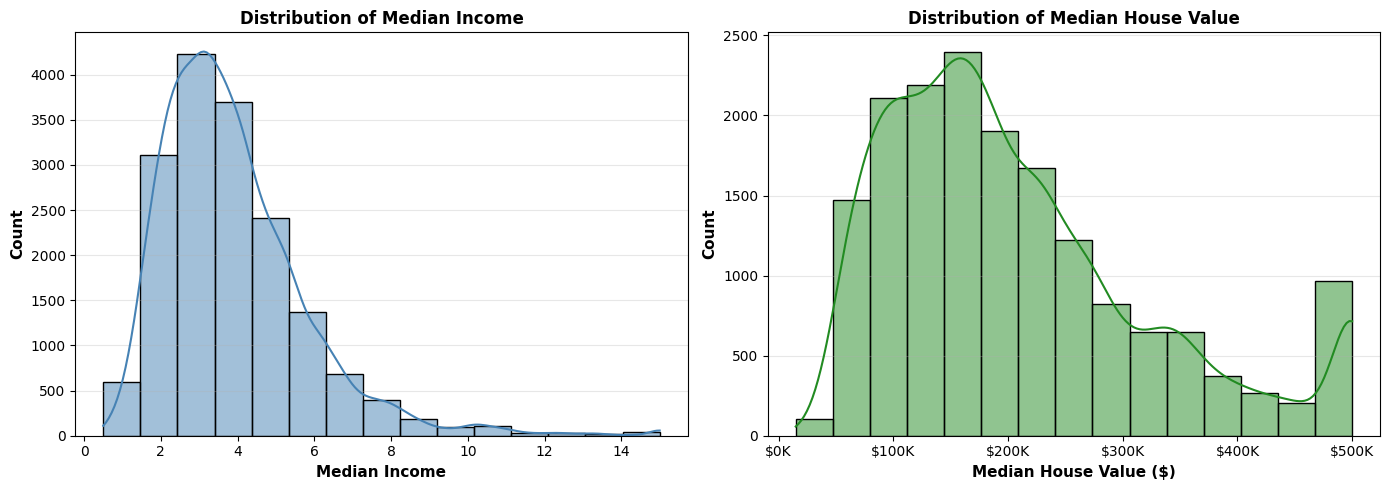

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Median Income distribution
sns.histplot(df['median_income'], bins=15, kde=True, color='steelblue', ax=axes[0])
axes[0].set_xlabel('Median Income', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Median Income', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Median House Value distribution
sns.histplot(df['median_house_value'], bins=15, kde=True, color='forestgreen', ax=axes[1])
axes[1].set_xlabel('Median House Value ($)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Median House Value', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

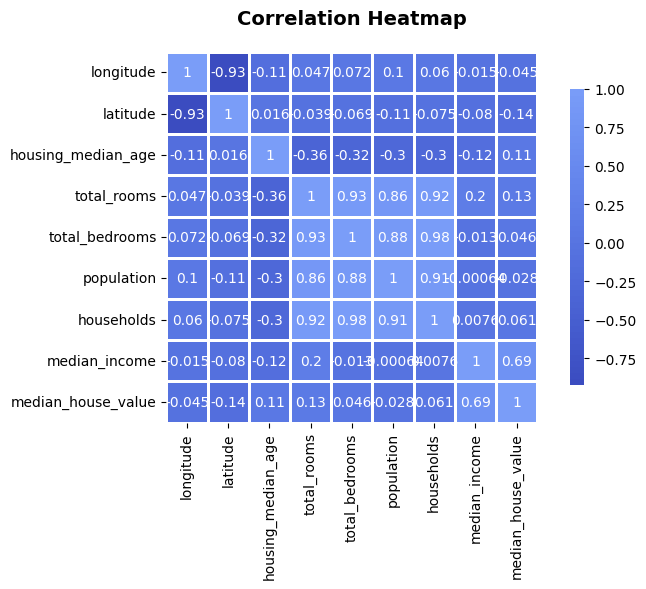

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=4,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

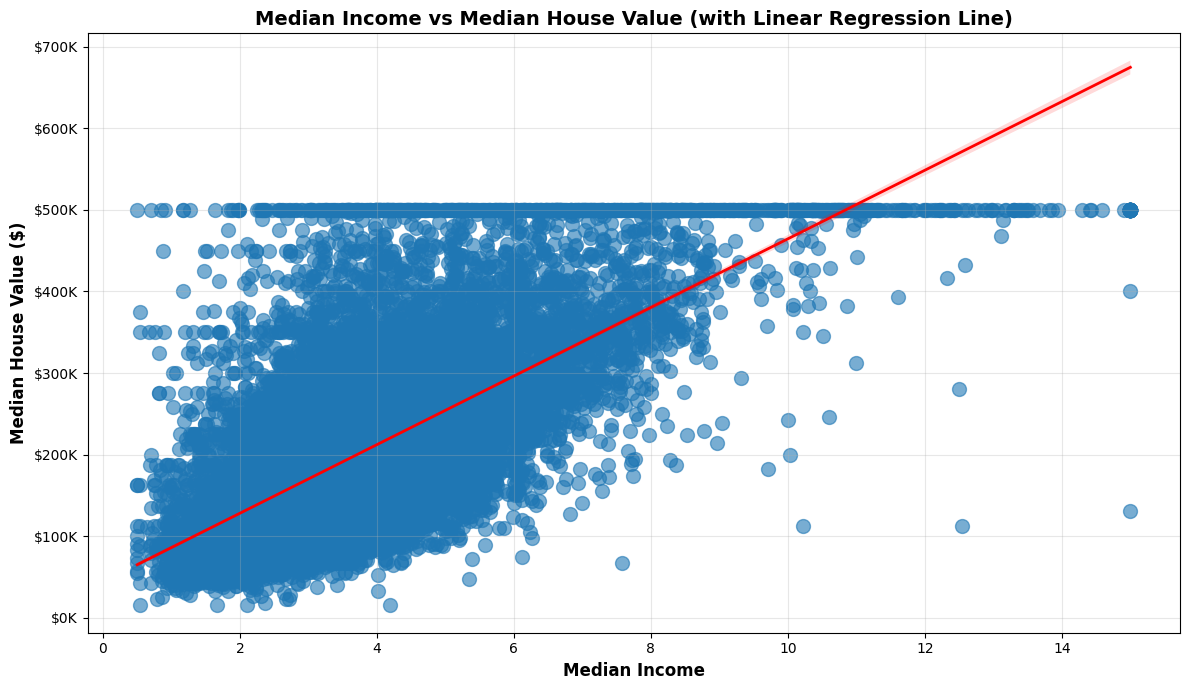

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.regplot(x='median_income', y='median_house_value', data=df, scatter_kws={'s': 100, 'alpha': 0.6},
           line_kws={'color': 'red', 'linewidth': 2}, ax=ax)

ax.set_xlabel('Median Income', fontsize=12, fontweight='bold')
ax.set_ylabel('Median House Value ($)', fontsize=12, fontweight='bold')
ax.set_title('Median Income vs Median House Value (with Linear Regression Line)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.tight_layout()
plt.show()

In [30]:
pip install gradio

In [42]:
sample_income = 5.0 # Example median income
predicted_value = predict_house_value(sample_income)
print(f"For a median income of {sample_income}, the predicted median house value is: {predicted_value}")

For a median income of 5.0, the predicted median house value is: $242,125.30


In [32]:
import numpy as np
def predict_house_value(median_income):
    # The model was trained with X as a 2D array, so we need to reshape the input.
    income_array = np.array([[median_income]])
    prediction = rf_model.predict(income_array)[0]
    return f"${prediction:,.2f}"

print("Prediction function 'predict_house_value' defined.")

Prediction function 'predict_house_value' defined.


In [43]:
import gradio as gr

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_house_value,
    inputs=gr.Number(label="Median Income"),
    outputs=gr.Textbox(label="Predicted Median House Value"),
    title="California House Value Predictor",
    description="Enter the median income to predict the median house value."
)

# Launch the interface
interface.launch(inline=True)
print("Gradio interface launched.")

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f6081077a6383b87e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Gradio interface launched.
